In [1]:
#This dataset is a daily record of the top trending YouTube videos.
#https://www.kaggle.com/harshithgupta/youtubes-channels-dataset
#https://developers.google.com/youtube/v3 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

# Data Wrangling

In [3]:
file = '../YouTubeDataset_withChannelElapsed.json'

with open(file) as train_file:
    data = json.load(train_file)

In [4]:
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [5]:
df.head()

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0.16519925596076884,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.5555555555555556,95.11111111111111,30,18,--DwgB78t-c,0.0005841121495327102,...,0.0,488.46666666666664,50040,10,1,0.05555555555555555,814.1111111111111,0.03421262989608313,2012-01-19T18:38:28.000Z,0
1,1.1338200815767217,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.2391304347826087,59.32608695652174,51,184,--NZRkXBV7k,0.00027482594356907294,...,0.00018321729571271528,2076.6470588235293,22080,44,3,0.016304347826086956,575.5923913043479,0.4943840579710145,2015-03-30T04:04:40.000Z,2
2,0.6681201550387597,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023668639053254437,10.289940828402367,72,338,--hoQ2sGG4M,0.0002875215641173088,...,0.0005750431282346176,670.3472222222222,71544,8,1,0.0029585798816568047,142.7958579881657,0.04861344067986134,2009-08-07T06:51:10.000Z,2
3,25.65350494473531,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301256178858102,0.8841775883179901,172,22051,--sBoaqBlzA,0.00030773965225419295,...,0.0005128994204236549,12306.523255813954,54096,161,6,0.00027209650355992926,95.99210920139676,0.3604148181011535,2011-08-04T01:07:38.000Z,10
4,52.773777521761396,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545454545454545,10.004545454545454,2777,220,--7h1S4neDM,0.0,...,0.0,593.8332733165287,30120,1,0,0.0,7495.795454545455,0.07307436918990703,2014-04-29T15:44:44.000Z,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   totalviews/channelelapsedtime  575610 non-null  object
 1   channelId                      575610 non-null  object
 2   videoCategoryId                575610 non-null  object
 3   channelViewCount               575610 non-null  object
 4   likes/subscriber               575610 non-null  object
 5   views/subscribers              575610 non-null  object
 6   videoCount                     575610 non-null  object
 7   subscriberCount                575610 non-null  object
 8   videoId                        575610 non-null  object
 9   dislikes/views                 575610 non-null  object
 10  channelelapsedtime             575610 non-null  object
 11  comments/subscriber            575610 non-null  object
 12  likes/views                    575610 non-nu

In [7]:
df = df[['channelId','videoId','videoCategoryId','channelViewCount','videoCount','subscriberCount',
        'channelelapsedtime','channelCommentCount','videoViewCount','elapsedtime',
        'videoLikeCount','videoDislikeCount','videoPublished','VideoCommentCount']]

In [8]:
numeric = ['channelViewCount','videoCount','subscriberCount',
        'channelelapsedtime','channelCommentCount','videoViewCount','elapsedtime',
        'videoLikeCount','videoDislikeCount','VideoCommentCount']

df[numeric] = df[numeric].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   channelId            575610 non-null  object
 1   videoId              575610 non-null  object
 2   videoCategoryId      575610 non-null  object
 3   channelViewCount     575610 non-null  int64 
 4   videoCount           575610 non-null  int64 
 5   subscriberCount      575610 non-null  int64 
 6   channelelapsedtime   575610 non-null  int64 
 7   channelCommentCount  575610 non-null  int64 
 8   videoViewCount       575610 non-null  int64 
 9   elapsedtime          575610 non-null  int64 
 10  videoLikeCount       575610 non-null  int64 
 11  videoDislikeCount    575610 non-null  int64 
 12  videoPublished       575610 non-null  object
 13  VideoCommentCount    575610 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 61.5+ MB


In [10]:
df['videoPublished'] = pd.to_datetime(df['videoPublished'])
df['Year'] = df.videoPublished.dt.year
df['Month'] = df.videoPublished.dt.month
df['Weekday'] = df.videoPublished.dt.weekday
df['Day'] = df.videoPublished.dt.day
df['Hour'] = df.videoPublished.dt.hour

In [11]:
df.videoPublished.min(), df.videoPublished.max()

(Timestamp('2005-08-06 23:14:29+0000', tz='UTC'),
 Timestamp('2015-10-05 17:54:24+0000', tz='UTC'))

In [12]:
df = df.loc[df.Year == 2014]

df.shape

(83769, 19)

In [13]:
df = df.drop(columns=['videoPublished', 'Year'])

In [14]:
df = df.loc[df.videoViewCount >= 0]
df = df.loc[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df = df.loc[(df.videoLikeCount >= 0) & (df.videoDislikeCount >= 0) & (df.VideoCommentCount >= 0)]

#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
df = df[(np.abs(stats.zscore(df[numeric])) < 3).all(axis=1)]

df.shape

(78588, 17)

In [15]:
df.videoCategoryId.value_counts().sort_values(ascending=True)

44        9
43       89
29      518
15      827
23     1364
25     1402
19     1558
27     2056
1      3098
28     3133
2      3741
26     5465
17     6507
24     8667
10    11052
20    12307
22    16795
Name: videoCategoryId, dtype: int64

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.head()

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
0,UCNWPDyaWf2eAHnofFLSnEMg,--7h1S4neDM,20,1649075,2777,220,31248,0,2201,30120,1,0,0,4,1,29,15
1,UC_6j2h3N5jNjx-IVWhIeXhQ,--udooZCtNE,23,3654369,115,14778,51408,86,11377,27720,168,15,102,8,2,6,20
2,UCSfdh8cOnTt4qoyilCKVrgQ,--ZY8kZbirk,10,534724,80,433,85128,4,6519,27480,42,0,1,8,5,16,17
3,UCrfnNPLMIHZI-wDupFVPcBA,--o_H9JrCCw,20,29200208,4597,61094,86328,2948,3715,32424,66,17,35,1,2,22,23
4,UC6USZimMmwjrbDGKjyaVwVA,--Ati1o2z8Q,27,114327,31,269,56088,5,2323,31200,8,1,7,3,5,15,5


In [18]:
df.isnull().sum()

channelId              0
videoId                0
videoCategoryId        0
channelViewCount       0
videoCount             0
subscriberCount        0
channelelapsedtime     0
channelCommentCount    0
videoViewCount         0
elapsedtime            0
videoLikeCount         0
videoDislikeCount      0
VideoCommentCount      0
Month                  0
Weekday                0
Day                    0
Hour                   0
dtype: int64

In [19]:
df.describe()

,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
count,7.858800e+04,78588.000000,7.858800e+04,78588.000000,78588.000000,7.858800e+04,78588.000000,78588.000000,78588.000000,78588.000000,78588.000000,78588.000000,78588.000000,78588.000000
mean,2.755296e+07,935.529610,6.342803e+04,52908.541877,125.214320,3.405353e+04,28705.315315,245.711979,14.281035,28.122347,6.351008,2.916603,15.658917,12.786036
std,1.057370e+08,2650.133422,2.028062e+05,20287.436131,904.146768,1.357952e+05,2514.361519,883.760788,52.526157,82.941107,3.433679,1.998464,8.793551,6.633402
min,0.000000e+00,0.000000,0.000000e+00,5400.000000,0.000000,1.006000e+03,24192.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.123132e+05,33.000000,1.830000e+02,35856.000000,0.000000,2.580000e+03,26544.000000,13.000000,0.000000,1.000000,3.000000,1.000000,8.000000,8.000000
50%,1.105028e+06,151.000000,2.264000e+03,48792.000000,0.000000,5.604500e+03,28800.000000,35.000000,2.000000,5.000000,6.000000,3.000000,16.000000,14.000000
75%,9.319589e+06,642.000000,2.361500e+04,65712.000000,10.000000,1.727925e+04,30912.000000,121.000000,8.000000,19.000000,9.000000,5.000000,23.000000,18.000000
max,1.713859e+09,32000.000000,2.247639e+06,108913.000000,31165.000000,3.538617e+06,32952.000000,17859.000000,1133.000000,1319.000000,12.000000,6.000000,31.000000,23.000000


In [20]:
df.shape

(78588, 17)

# Exploratory Data Analysis

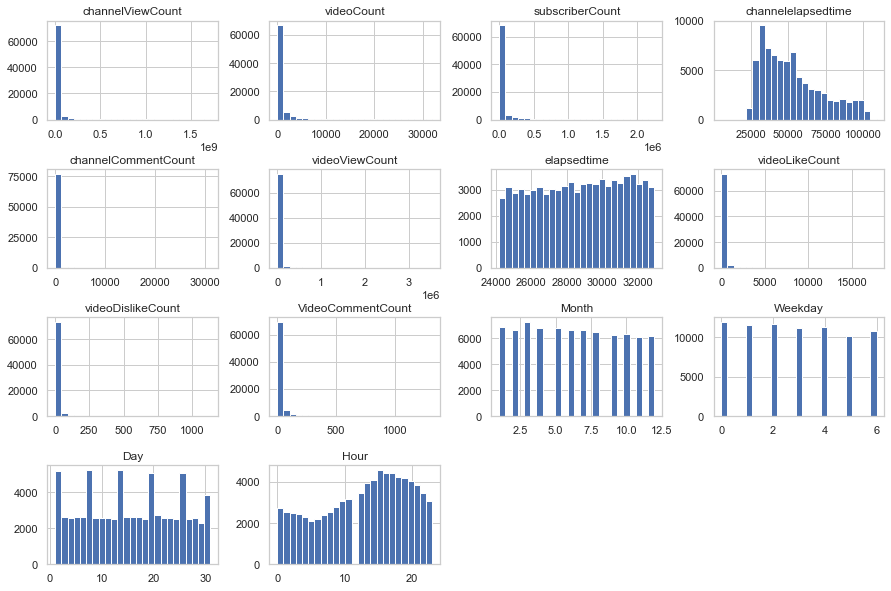

In [21]:
sns.set_theme(style = "whitegrid")

df.hist(figsize=(15,10), bins=25)
plt.subplots_adjust(hspace=0.5);

## Channel Level Data

### Channel ID

In [22]:
df.channelId.value_counts(ascending=False)

UCVmqfvWsKeFaMGY68CbcVVQ    30
UC1cWTErb7vw_UmmuB0dYgsQ    20
UCFQdwnVf66D3Abx6DxXN8UA    20
UChI4p4l9OlVJ41c6AYQBtlw    20
UCIw5rbXUrtk31t20Ap5817w    19
                            ..
UCb7iRBgXXvsm63sb3SdHM9w     1
UCvToCGWwuZ7prr9bM5eW7mA     1
UClH8MM292OuNf2jbFhNDbvw     1
UCLFZBXBK60lgc6mtomcpXow     1
UCLYTCRkpA7wg0SvLHTM6khA     1
Name: channelId, Length: 64581, dtype: int64

In [23]:
df[df.channelId == 'UCVmqfvWsKeFaMGY68CbcVVQ'].head(10)

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
48,UCVmqfvWsKeFaMGY68CbcVVQ,--kDbi_HFxA,20,168400902,18798,111989,75072,8,4667,26784,6,1,7,9,0,15,3
3572,UCVmqfvWsKeFaMGY68CbcVVQ,35LhymmKroc,20,168498404,18803,112110,75072,8,6240,31992,27,1,0,2,0,10,2
6465,UCVmqfvWsKeFaMGY68CbcVVQ,3DH_P6xH_M4,20,168498404,18803,112110,75072,8,2337,30960,2,0,2,3,1,25,3
7568,UCVmqfvWsKeFaMGY68CbcVVQ,3OZF6C6wZTo,20,168498404,18803,112113,75072,8,1224,30912,3,0,0,3,3,27,2
12491,UCVmqfvWsKeFaMGY68CbcVVQ,4Ilr9rZpQ3c,20,168498404,18803,112110,75072,8,2535,29400,2,0,0,5,3,29,0
12492,UCVmqfvWsKeFaMGY68CbcVVQ,4IRELIOjvgU,20,168498404,18803,112110,75072,8,3909,32400,12,0,1,1,4,24,2
13768,UCVmqfvWsKeFaMGY68CbcVVQ,5-JSSOsrXVU,20,168498404,18803,112110,75072,8,13985,26040,24,5,21,10,3,16,2
14758,UCVmqfvWsKeFaMGY68CbcVVQ,58j1u6y3oeI,20,168498404,18803,112110,75072,8,1148,30264,3,1,1,4,2,23,2
14792,UCVmqfvWsKeFaMGY68CbcVVQ,589KR_jIq5c,20,168498404,18803,112110,75072,8,1116,32568,1,0,2,1,4,17,2
15650,UCVmqfvWsKeFaMGY68CbcVVQ,5e6cp4A_u-Q,20,168498404,18803,112110,75072,8,2970,27048,4,2,17,9,3,4,3


### Channel View Count

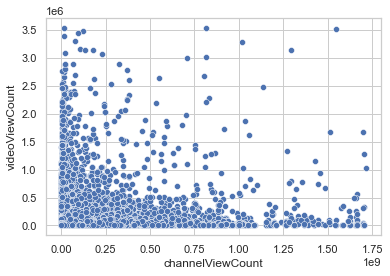

In [24]:
ax = sns.scatterplot(data=df, x="channelViewCount", y="videoViewCount")

In [25]:
df[df.channelViewCount == 0].head(10)

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
2121,UCN5K-Qz2QN-4-Mc5TMXzVLg,-fNscVuAUEo,24,0,0,656,35304,0,1873,27384,13,3,12,8,2,20,18
2990,UCx5UHO8Hs4hBmJWIfIbOwWw,31ePTfNHiqQ,2,0,0,4063,51768,1,12732,28176,27,2,5,7,4,18,18
3432,UCcivw7DoWwv2v4sP-N-sMsw,34CKOJ5ug-w,20,0,0,21830,42576,44,5383,25776,188,5,14,10,0,27,13
3711,UCWBeqiW07YKJKb0wiEVpWog,35OUvyRFZr4,24,0,0,417,53904,14,2620,32088,51,1,8,2,3,6,14
5643,UC1BWJ-xyJ5piZ4C1DD2B1LA,3xQYEybKKys,19,0,0,2845,82152,0,4011,25440,6,1,1,11,0,10,0
7046,UCar6gK18tYDtLgeTD6VtAbg,3JVaYii1yTM,26,0,0,26455,52512,95,16824,27720,332,17,39,8,2,6,22
7132,UC6SsduLPRTId3zhb6psIFAg,3JojrNESofk,20,0,0,13,27168,0,5810,26856,9,3,81,9,3,11,20
8896,UCFDJAbKHtq-vkQkfo-DDVxg,42sdqSKt4E4,22,0,0,53,28128,0,7730,28056,65,66,21,7,2,23,20
15271,UCly3STZJ4hEZf-T6FflaaDw,5c0LkdR2s34,23,0,0,73,29304,0,68931,27432,831,12,41,8,0,18,18
16216,UC7mTiYBIHGjLTau2WPp9low,5r9XBNmRWx8,24,0,0,21,35736,0,10876,30816,16,7,4,3,0,31,3


In [26]:
#How is channelviewcount 0 when videoviewcount is greater than 0?
df[df.channelViewCount == 0].shape

(48, 17)

### VideoCount

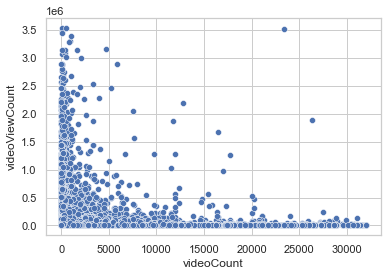

In [27]:
ax = sns.scatterplot(data=df, x="videoCount", y="videoViewCount")

In [28]:
df[df.videoCount == 0].head()

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
1384,UCb-nI22s-_dUVtoQZI-W5uA,-7j6dTdzhr8,24,11,0,1858,56040,148,1645,24456,5,1,9,12,5,20,19
2121,UCN5K-Qz2QN-4-Mc5TMXzVLg,-fNscVuAUEo,24,0,0,656,35304,0,1873,27384,13,3,12,8,2,20,18
2990,UCx5UHO8Hs4hBmJWIfIbOwWw,31ePTfNHiqQ,2,0,0,4063,51768,1,12732,28176,27,2,5,7,4,18,18
3432,UCcivw7DoWwv2v4sP-N-sMsw,34CKOJ5ug-w,20,0,0,21830,42576,44,5383,25776,188,5,14,10,0,27,13
3711,UCWBeqiW07YKJKb0wiEVpWog,35OUvyRFZr4,24,0,0,417,53904,14,2620,32088,51,1,8,2,3,6,14


In [29]:
#How is channel video count 0 if each line has a video Id for that channel?
df[df.videoCount == 0].shape

(57, 17)

### Subscriber Count

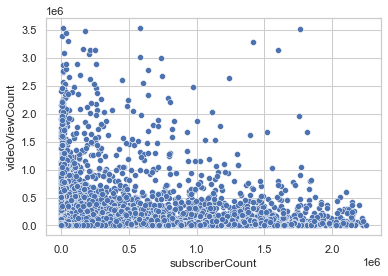

In [30]:
ax = sns.scatterplot(data=df, x="subscriberCount", y="videoViewCount")

In [31]:
df[df.subscriberCount == 0].shape

(2200, 17)

### Channel Elapsed Time

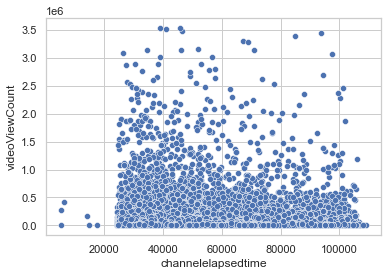

In [32]:
ax = sns.scatterplot(data=df, x="channelelapsedtime", y="videoViewCount")

In [33]:
df[df.channelelapsedtime < 20000]

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
2083,UCMRJqoSRIaakAJUJK104Z8Q,-f-rBk7Y9hM,22,207824319,714,130572,6480,0,425507,30792,1281,67,53,4,1,1,13
4813,UC9oEzPGZiTE692KucAsTY1g,3f2ANFUk2oY,24,71275001,631,33405,5400,0,274101,25800,763,67,158,10,5,25,20
9012,UC9oEzPGZiTE692KucAsTY1g,43BU7ZuF92s,24,71275001,631,33400,5400,0,7901,29592,290,4,18,5,2,21,16
27456,UCE_--R1P5-kfBzHTca0dsnw,-lc5Kc9WTTk,24,405422256,1116,1224879,13992,0,163895,25176,2032,28,216,11,3,20,21
33219,UCKoS1r1M9eJBIPWXRat8uEA,82N4Ytre6Aw,24,87258240,4601,186207,17688,0,16182,30624,83,17,5,4,1,8,3
35735,UCiZ47iCEOmqsyZU_6XP9ekg,8CSyv4I2wFk,24,19425563,354,60873,14664,0,10940,30552,68,3,6,4,4,11,8


In [34]:
df[df.channelelapsedtime < df.elapsedtime]

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
2083,UCMRJqoSRIaakAJUJK104Z8Q,-f-rBk7Y9hM,22,207824319,714,130572,6480,0,425507,30792,1281,67,53,4,1,1,13
4813,UC9oEzPGZiTE692KucAsTY1g,3f2ANFUk2oY,24,71275001,631,33405,5400,0,274101,25800,763,67,158,10,5,25,20
9012,UC9oEzPGZiTE692KucAsTY1g,43BU7ZuF92s,24,71275001,631,33400,5400,0,7901,29592,290,4,18,5,2,21,16
27456,UCE_--R1P5-kfBzHTca0dsnw,-lc5Kc9WTTk,24,405422256,1116,1224879,13992,0,163895,25176,2032,28,216,11,3,20,21
33219,UCKoS1r1M9eJBIPWXRat8uEA,82N4Ytre6Aw,24,87258240,4601,186207,17688,0,16182,30624,83,17,5,4,1,8,3
35735,UCiZ47iCEOmqsyZU_6XP9ekg,8CSyv4I2wFk,24,19425563,354,60873,14664,0,10940,30552,68,3,6,4,4,11,8
49492,UCvprYNtJt9L7eIPr_gZ2-qA,R1Nvp4lZxu0,22,26299196,295,116886,24792,0,45545,26928,985,45,486,9,1,9,14
70104,UCvprYNtJt9L7eIPr_gZ2-qA,XqMjuxX5aoU,22,26299196,295,116891,24792,0,181723,31656,1575,42,132,2,0,24,11


### Channel Comment Count

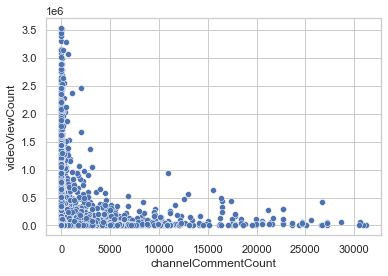

In [35]:
ax = sns.scatterplot(data=df, x="channelCommentCount", y="videoViewCount")

In [36]:
df[df.channelCommentCount == 0].head(10)

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
0,UCNWPDyaWf2eAHnofFLSnEMg,--7h1S4neDM,20,1649075,2777,220,31248,0,2201,30120,1,0,0,4,1,29,15
5,UC-ofUgXWCeaMSfjX8mBCbBw,--0iB-BW0lo,20,145314574,709,392399,30864,0,332423,27072,4873,55,333,9,2,3,14
6,UCrANDreLc7mG5mP66J6admw,--WIBhoG6ds,28,2155962,194,5168,34920,0,1941,30504,2,0,0,4,6,13,1
7,UCRNgihmjtQNhn_egg0Y6KDA,--DLsLQYKk8,2,43333,8,40,61920,0,22640,29976,36,7,3,5,6,4,22
9,UCWgK_4f2rYzU9jUru8-RxTA,--LkgPyiC70,24,1526389,397,6818,49272,0,3970,29400,60,0,12,5,3,29,15
13,UCR4DZnk4TP-WYtf8wB55h5g,--QALuCmUOw,22,274351,21,146,35376,0,37528,32280,39,15,1,1,2,29,1
14,UCsWWKbPsXvPm6gbc8NDLZLA,--mijhmLlJc,22,27294,5,38,38280,0,27135,31584,66,3,2,2,2,26,18
15,UCnUU48FFRDsyTC6R90Jvqwg,--Mm7ZEqjPM,26,603786,969,1463,49272,0,2037,30600,8,0,1,4,2,9,10
19,UCy_nPhSXxHnihL-9Phug0AA,--gMmijigDQ,22,21138739,413,0,32040,0,41808,30960,127,14,4,3,1,25,0
21,UCj_YB3cKoTAWwXWj_HikxQw,--ophJj8lXs,22,285233,33,409,34488,0,3484,28560,7,0,2,7,3,3,7


In [37]:
df[df.channelCommentCount == 0].shape

(42094, 17)

In [38]:
#How can channel comment count be 0 if video comment count is greater than 0?
df[(df.channelCommentCount == 0) & (df.VideoCommentCount != 0)].shape

(31395, 17)

## Video Level Data

### Video ID

In [39]:
df.videoId.value_counts(ascending=False)

zaE9QJVDBso    2
yhlkNPMhTNM    2
Z6cZdnu7X3g    2
46c72AOUaDM    2
Z2ojxuVNYJY    2
              ..
1wTOUPqOyUQ    1
3O1YgJG0QXA    1
-_jzNXbI5Y8    1
47gMF8z94-8    1
-fmiwTmmVeY    1
Name: videoId, Length: 75817, dtype: int64

In [40]:
df.shape, df.drop_duplicates(subset=['videoId']).shape

((78588, 17), (75817, 17))

In [41]:
df[df.videoId == 'Z6pary7q4Yo']

,channelId,videoId,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,Month,Weekday,Day,Hour
74949,UCCrqljEQonQsG5N8LpSPWcw,Z6pary7q4Yo,22,5159400,27,10456,46392,0,664326,27456,1664,234,64,8,6,17,23
75034,UCCrqljEQonQsG5N8LpSPWcw,Z6pary7q4Yo,22,5159400,27,10456,46392,0,664326,27456,1664,234,64,8,6,17,23


### Video Category ID

In [42]:
df.videoCategoryId.value_counts()

22    16795
20    12307
10    11052
24     8667
17     6507
26     5465
2      3741
28     3133
1      3098
27     2056
19     1558
25     1402
23     1364
15      827
29      518
43       89
44        9
Name: videoCategoryId, dtype: int64

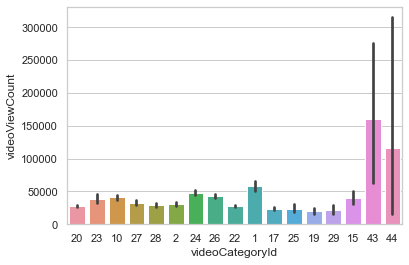

In [43]:
ax = sns.barplot(x="videoCategoryId", y="videoViewCount", data=df)

### Elapsed Time

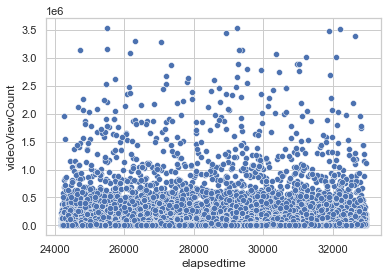

In [44]:
ax = sns.scatterplot(data=df, x="elapsedtime", y="videoViewCount")

### Video Like Count

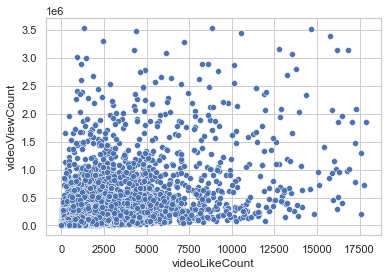

In [45]:
ax = sns.scatterplot(data=df, x="videoLikeCount", y="videoViewCount")

### Video Dislike Count

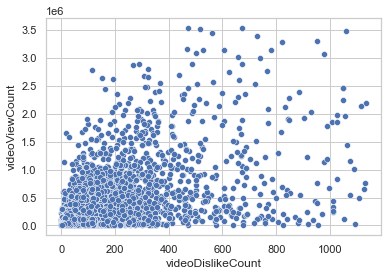

In [46]:
ax = sns.scatterplot(data=df, x="videoDislikeCount", y="videoViewCount")

### Video Comment Count

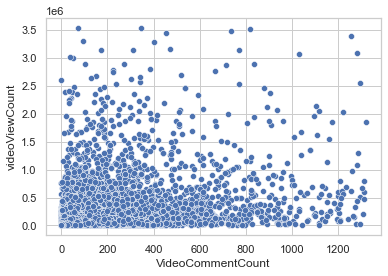

In [47]:
ax = sns.scatterplot(data=df, x="VideoCommentCount", y="videoViewCount")

## Video Publishing Time Data

### Month

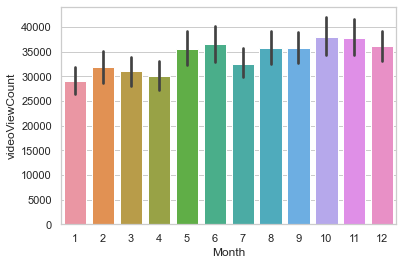

In [48]:
ax = sns.barplot(x="Month", y="videoViewCount", data=df)

### Day

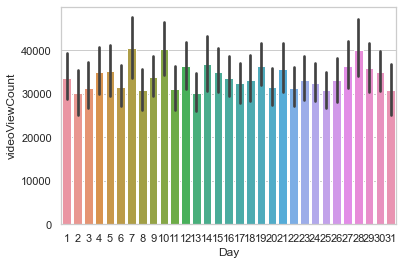

In [49]:
ax = sns.barplot(x="Day", y="videoViewCount", data=df)

### Weekday

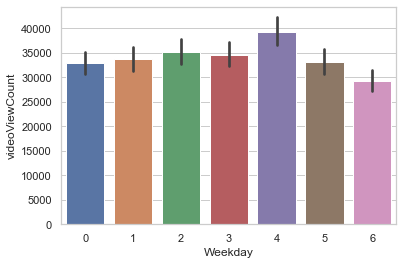

In [50]:
ax = sns.barplot(x="Weekday", y="videoViewCount", data=df)

### Hour

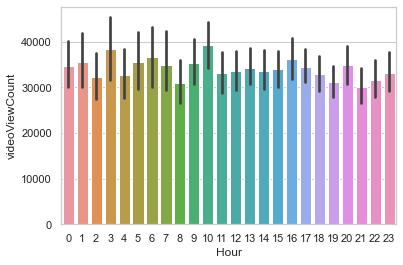

In [51]:
ax = sns.barplot(x="Hour", y="videoViewCount", data=df)

# Pre-processing & Training

In [52]:
df = df[['subscriberCount','videoViewCount','elapsedtime',
        'videoLikeCount','videoDislikeCount','Weekday','VideoCommentCount']]

In [53]:
#vid_cat_dummies = pd.get_dummies(df.videoCategoryId)

In [54]:
weekday_dummies = pd.get_dummies(df.Weekday)

In [55]:
data = pd.concat([df.loc[:, df.columns != 'Weekday'], weekday_dummies], axis=1)

data

,subscriberCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,0,1,2,3,4,5,6
0,220,2201,30120,1,0,0,0,1,0,0,0,0,0
1,14778,11377,27720,168,15,102,0,0,1,0,0,0,0
2,433,6519,27480,42,0,1,0,0,0,0,0,1,0
3,61094,3715,32424,66,17,35,0,0,1,0,0,0,0
4,269,2323,31200,8,1,7,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78583,658,1975,27576,34,2,5,0,1,0,0,0,0,0
78584,30036,21513,31368,86,9,4,0,0,0,0,1,0,0
78585,3,2090,30912,0,0,0,0,0,1,0,0,0,0
78586,7572,1243,30480,3,0,0,1,0,0,0,0,0,0


In [56]:
X = data.drop(columns=['videoViewCount'])
y = data.videoViewCount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
X_train.shape, X_test.shape

((55011, 12), (23577, 12))

# Modeling

In [58]:
def scores(model, scaled, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cv=5, print_score=True):
    if scaled == True:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)

    r2_tr = r2_score(y_train, y_tr_pred)
    r2_te = r2_score(y_test, y_te_pred)
    mae_tr = mean_absolute_error(y_train, y_tr_pred)
    mae_te = mean_absolute_error(y_test, y_te_pred)
    mse_tr = mean_squared_error(y_train, y_tr_pred)
    mse_te = mean_squared_error(y_test, y_te_pred)
    
    cv_results = cross_validate(model, X_train, y_train, cv=cv)
    cv_scores = cv_results['test_score']
    
    if print_score == True:
        print("R2 score: {0}, {1}".format(r2_tr, r2_te))
        print("MAE score: {0}, {1}".format(mae_tr, mae_te))
        print("MSE score: {0}, {1}".format(mse_tr, mse_te))
        print("CV scores: {0}".format(cv_scores))
        
    return cv_scores

In [59]:
lin_reg = LinearRegression()

In [60]:
lin_reg_cv = scores(lin_reg, scaled=True)

R2 score: 0.5420213915017518, 0.5810007946069948
MAE score: 24453.116016723856, 24495.73523280613
MSE score: 8246372603.579816, 8150388286.57579
CV scores: [0.56339953 0.5611787  0.54425848 0.49479678 0.53817345]


In [61]:
random_forest = RandomForestRegressor(n_jobs=-1)

In [62]:
random_forest_cv = scores(random_forest, scaled=True)

R2 score: 0.9460499015869366, 0.635740010270692
MAE score: 7824.617180068067, 21366.543676576952
MSE score: 971426623.9918121, 7085599006.7410555
CV scores: [0.59739327 0.61546299 0.63125014 0.55686618 0.61121495]
